In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('WineQT.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Exploratory Data Analysis(EDA)
Feature selection and Data imputation

In [4]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


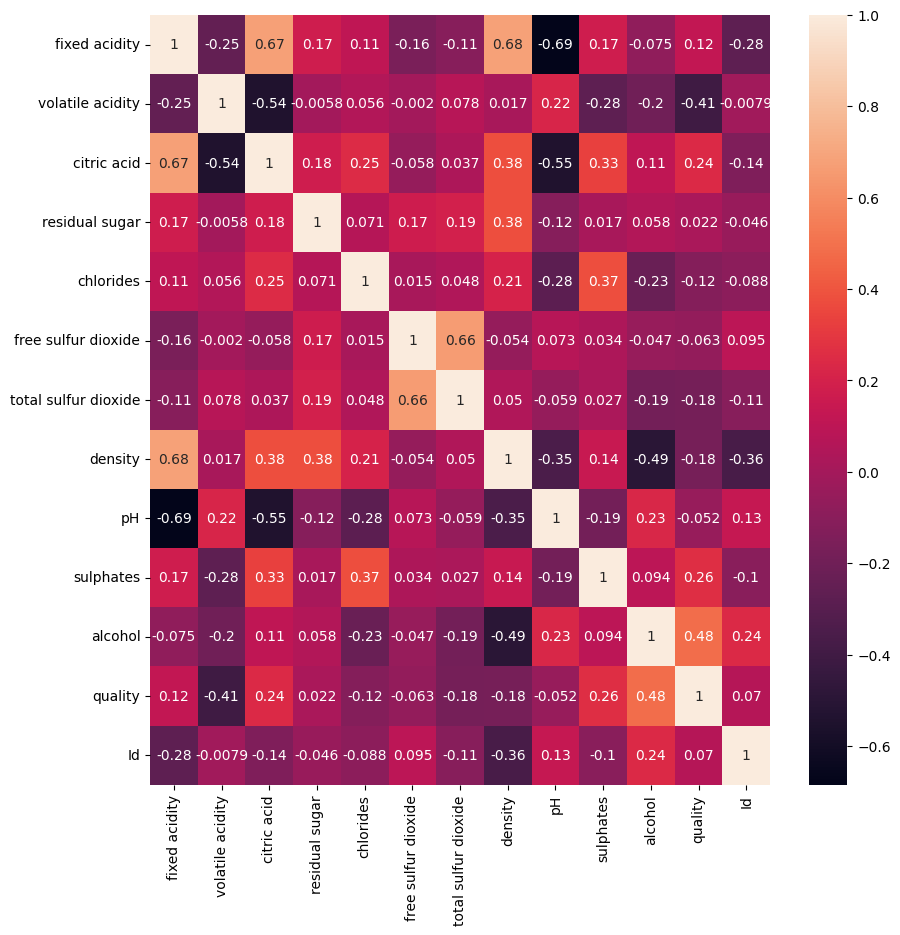

In [5]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(data.corr(),annot=True)
plt.show()

No two faetures are highly correlated so we've to consider all

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


**DATA IMPUTATION**

/tmp/ipython-input-7-1541798658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fixed acidity'])


<Axes: xlabel='fixed acidity', ylabel='Density'>

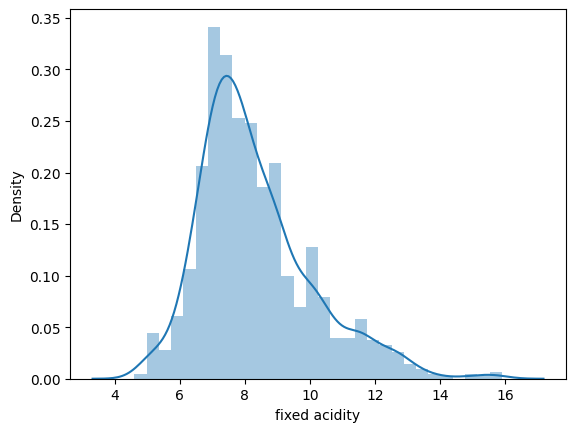

In [7]:
sns.distplot(data['fixed acidity'])

/tmp/ipython-input-8-2322546816.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, bins=30)
/tmp/ipython-input-8-2322546816.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, bins=30)
/tmp/ipython-input-8-2322546816.py:8: UserWarning: 

`distplot` is a

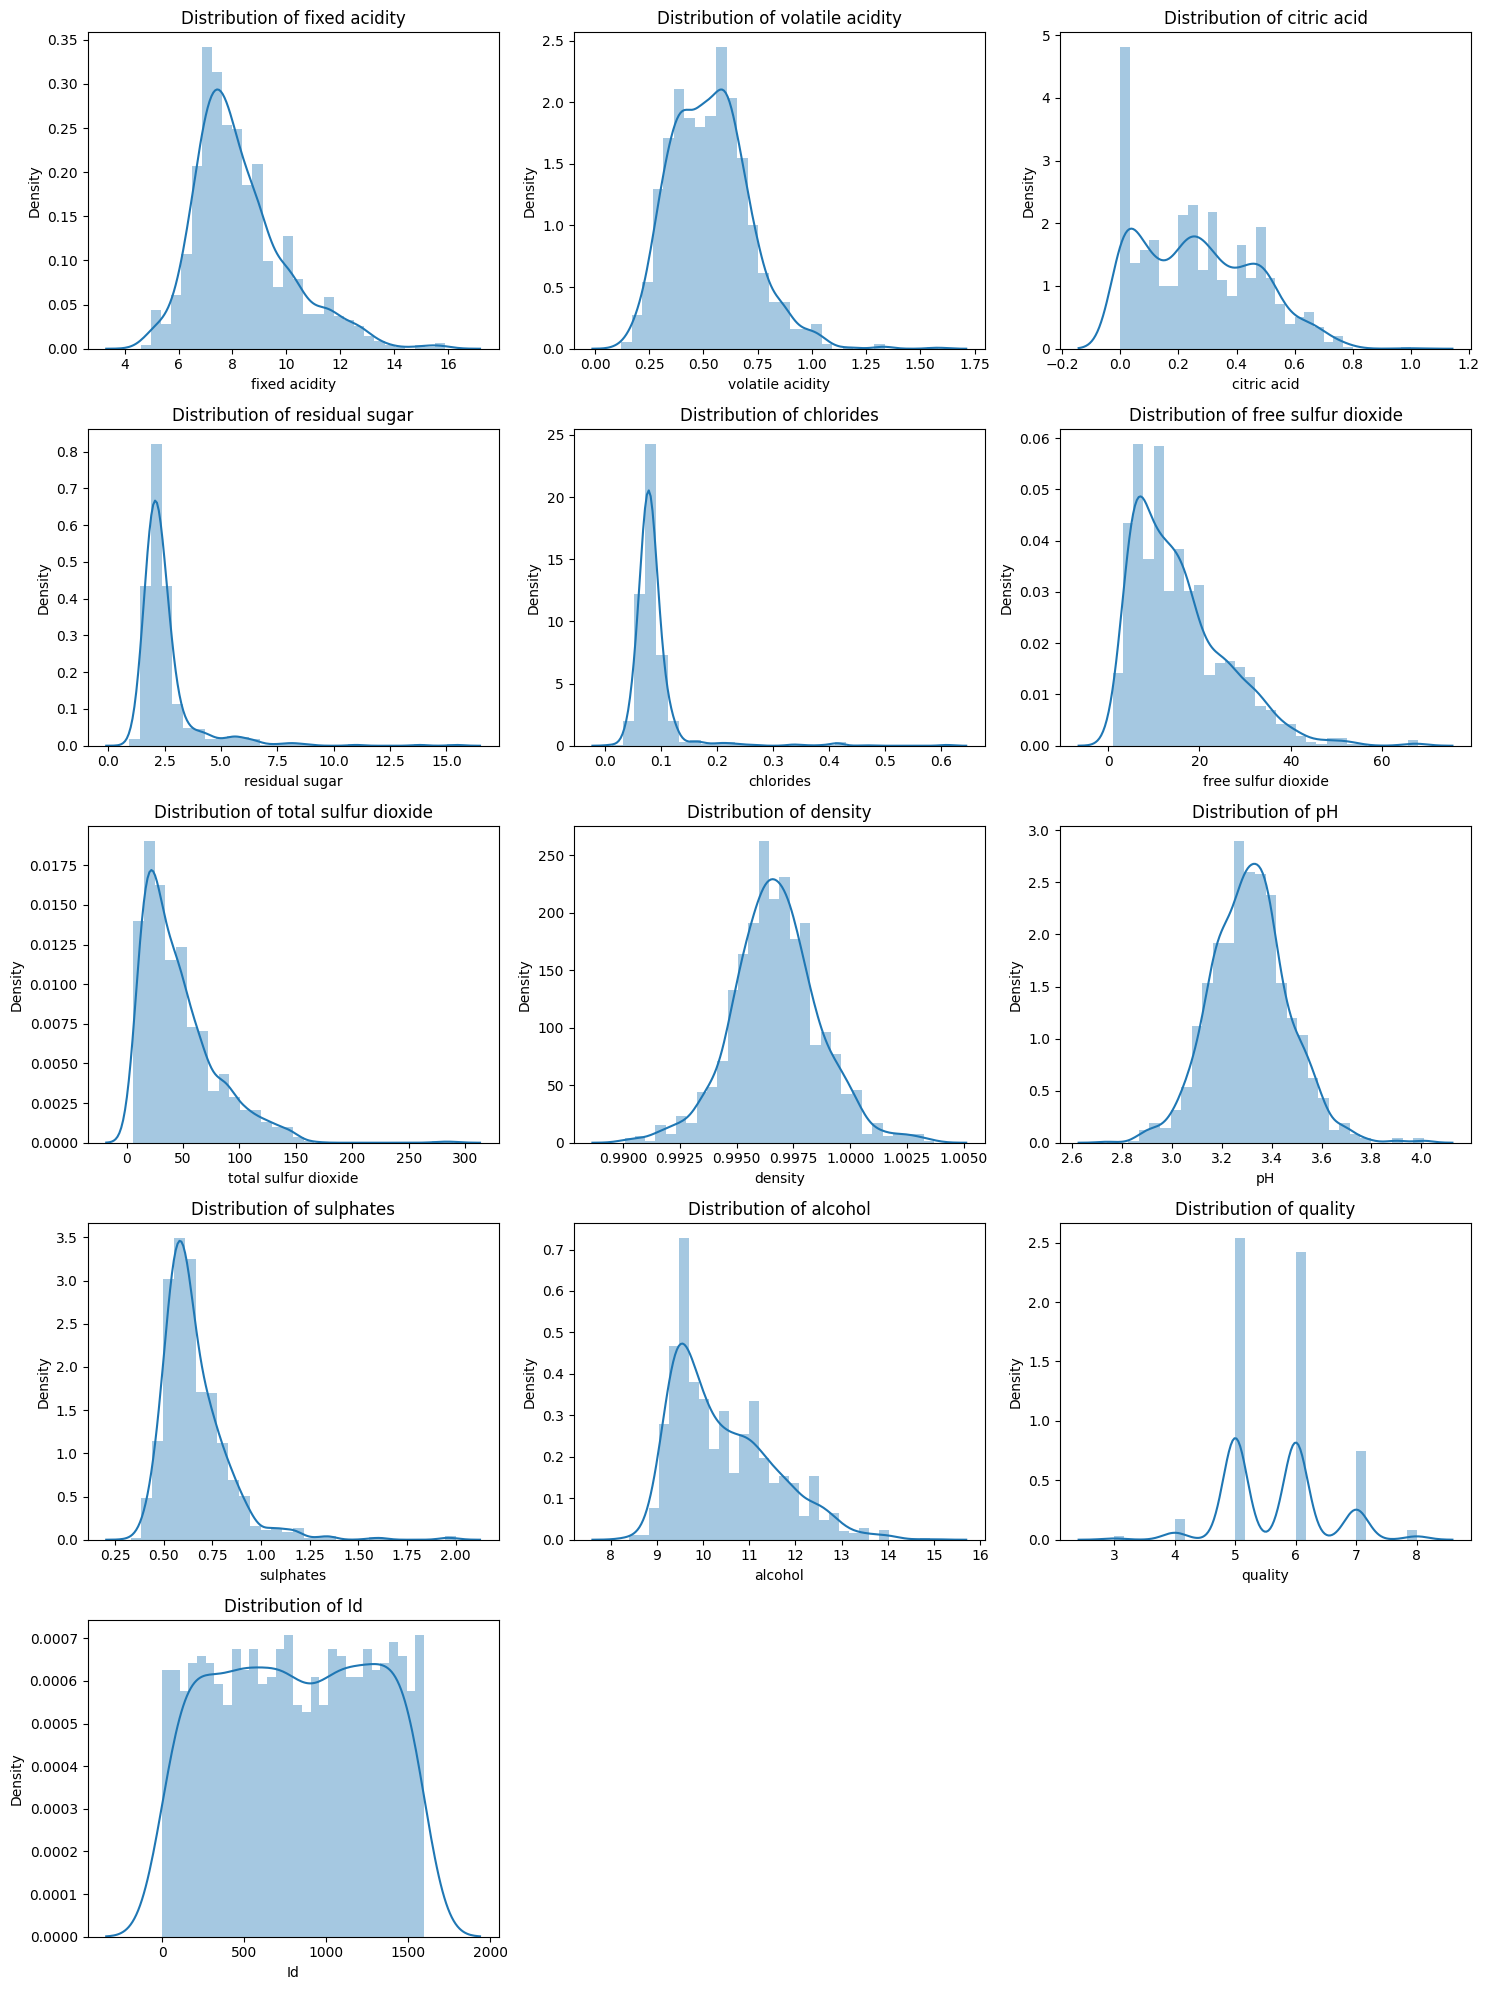

In [8]:
numeric_cols = data.select_dtypes(include=np.number).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.distplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [9]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [10]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [11]:
data['fixed acidity'] = data['fixed acidity'].replace(0, data['fixed acidity'].mean())
data['volatile acidity'] = data['volatile acidity'].replace(0, data['volatile acidity'].mean())
data['citric acid'] = data['citric acid'].replace(0, data['citric acid'].mean())
data['residual sugar'] = data['residual sugar'].replace(0, data['residual sugar'].median())
data['chlorides'] = data['chlorides'].replace(0, data['chlorides'].median())
data['free sulfur dioxide'] = data['free sulfur dioxide'].replace(0, data['free sulfur dioxide'].median())
data['total sulfur dioxide'] = data['total sulfur dioxide'].replace(0, data['total sulfur dioxide'].median())
data['density'] = data['density'].replace(0, data['density'].mean())
data['pH'] = data['pH'].replace(0, data['pH'].mean())
data['sulphates'] = data['sulphates'].replace(0, data['sulphates'].median())
data['alcohol'] = data['alcohol'].replace(0, data['alcohol'].median())
data['quality'] = data['quality'].replace(0, data['quality'].mean())
data['Id'] = data['Id'].replace(0, data['Id'].mean())



In [12]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.268364,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,804.969379
1,7.8,0.880,0.268364,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.000000
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.000000
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3.000000
4,7.4,0.700,0.268364,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4.000000
5,7.4,0.660,0.268364,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5.000000
6,7.9,0.600,0.060000,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6.000000
7,7.3,0.650,0.268364,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7.000000
8,7.8,0.580,0.020000,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8.000000
9,6.7,0.580,0.080000,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10.000000


OBSERVATION-all 0 values are eliminated

**PART2-Outliers Detection and Normalization**

Split data into input features and target values.
x=input feature and y= target value


In [13]:
x=data.drop(columns='quality',axis=1)
y=data['quality']

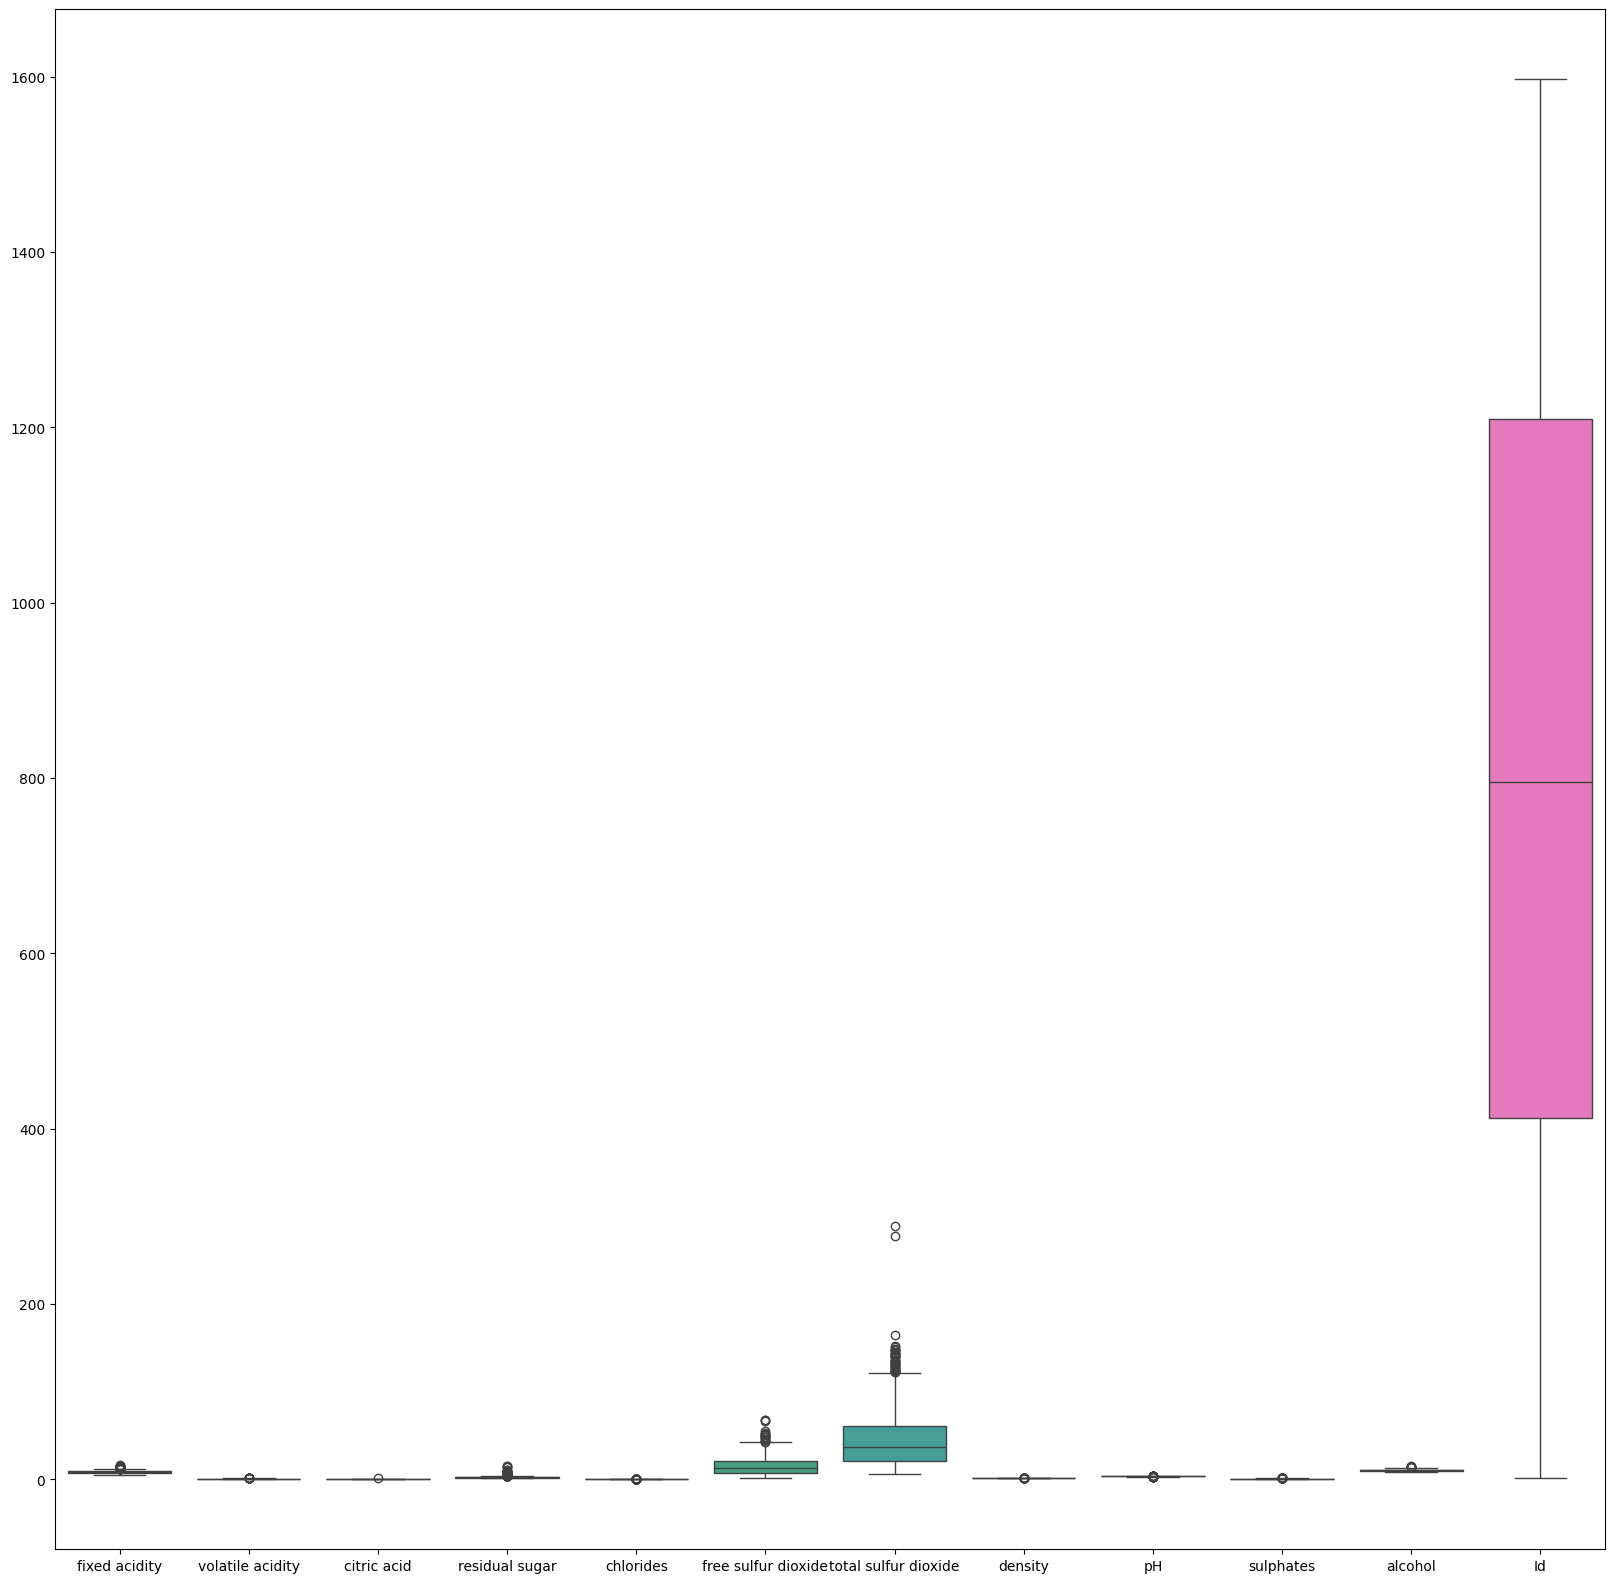

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(data=x, ax=ax)
plt.show()

In [15]:
x.shape#of all columns except for the target(quality)

(1143, 12)

In [16]:
y.shape#of the target

(1143,)

In [17]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [18]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'Id']
for col in cols:
  Q1=x[col].quantile(0.25)
  Q3=x[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  mask=(x[col]>=lower_bound)&(x[col]<=upper_bound)#these values lies for true values

In [19]:
x_outlier_detection=x[mask]
y_outlier_detection=y[mask]

In [20]:
x_outlier_detection.shape

(1143, 12)

In [21]:
y_outlier_detection.shape

(1143,)

**STANDARDIZATION**

Standard normal form->mean=0,standard deviation=1

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_outlier_detection)

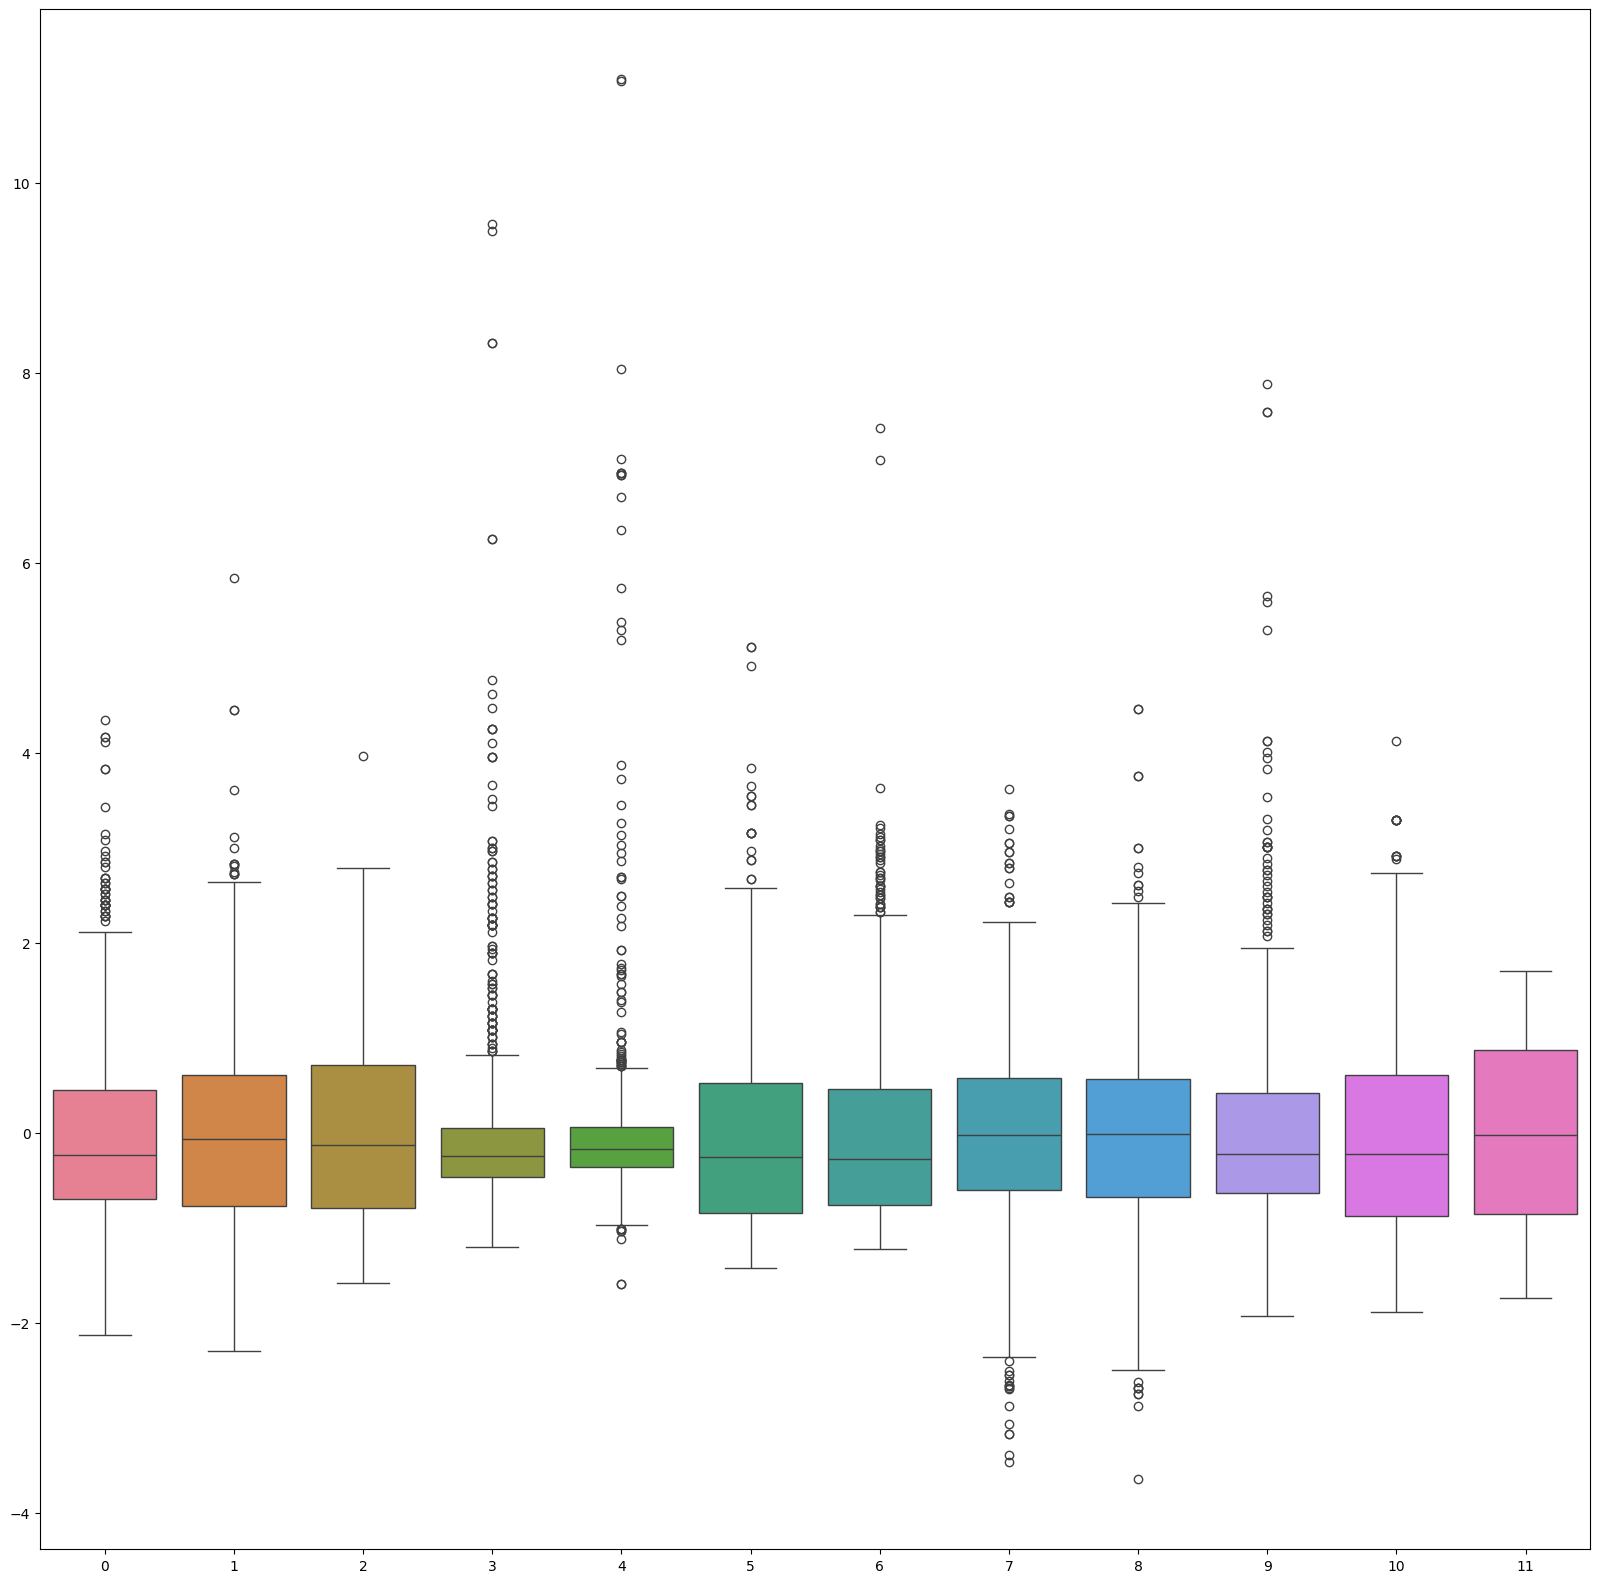

In [23]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=x_scaled,ax=ax)
plt.show()

In [24]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [25]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [26]:
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'Id']


In [27]:
type(x_scaled)

numpy.ndarray

#Data Splitting

1.   Split the data into input features and target feature
Split data into train and test set




In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)

Feature Scaling(if not handled properly then our model will become biased)
SatndardScaler=conver the entire feature into standarad normal form . It means the mean is 0 and standard deviation is 1

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Data Modelling: SVC classifier

In [30]:
from sklearn.svm import SVC
svm_classifier=SVC()
svm_classifier.fit(x_train,y_train)
svm_classifier.predict(x_train)
#predictions of entire data

array([6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 6, 5, 5, 6, 5, 5, 5, 6, 7, 6, 6,
       5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5,
       5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 5, 6,
       6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6,
       6, 7, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 7, 6, 5, 5,
       7, 5, 5, 6, 5, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 7,
       5, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 6, 7, 5, 6, 7, 6, 5, 6, 6, 6, 6,
       5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 7, 5, 7, 5, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 7, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 7, 5, 6, 7, 5, 5, 5,
       5, 5, 7, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5,
       5, 6, 6, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,

In [31]:
svm_classifier.score(x_train,y_train)
#getting better value than the decision tree

0.6969365426695843

#Hyper parameter tuning:GridSearchCV or RandomisedSearchCV

In [32]:
param_grid={
    'C':[0.1,1,10],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto'],
    'degree':[2,3,4]
}

In [33]:
#apply GridSeachCV
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(svm_classifier,param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [34]:
grid_search.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [35]:
#to apply the randomised search CV
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(svm_classifier,param_grid,cv=5)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']})

In [36]:
random_search.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 1}

In [37]:
#train the model with the best optimal parameters
svm_classifier_optimizedparams=SVC(C=1,gamma='scale',degree=2)
svm_classifier_optimizedparams.fit(x_train,y_train)

SVC(C=1, degree=2)

In [38]:
svm_classifier_optimizedparams.score(x_test,y_test)

0.6157205240174672